In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap as umap

c:\users\karapardazesh\appdata\local\programs\python\python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\karapardazesh\appdata\local\programs\python\python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\karapardazesh\appdata\local\p

In [2]:
df=pd.read_csv('anomaly.csv')

In [3]:
m=3.5

params = {
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],

    # Font sizes
    "axes.labelsize": 10*m,
    "font.size": 10*m,
    "legend.fontsize": 10*m,
    "xtick.labelsize": 9*m,
    "ytick.labelsize": 9*m,

    # Style for axis labels (xlabel, ylabel)
    'axes.labelweight': 'bold',
    'axes.labelcolor': 'black',

    # General styles for other elements
    'font.weight': 'bold',       # Makes title, etc., bold
    'xtick.color': 'black',      # Sets tick label color
    'ytick.color': 'black',
    'legend.labelcolor': 'black'
}

plt.rcParams.update(params)

In [4]:
features=['chem_num_atoms', 'chem_volume', 'chem_density', 'chem_avg_atomic_mass',
       'chem_avg_electronegativity', 'chem_electronegativity_variance',
       'chem_metal_fraction', 'chem_num_unique_elements',
       'chem_metal_atom_count', 'chem_volume_per_atom', 'geo_surface_area_m2g',
       'geo_surface_area_m2cm3', 'geo_void_fraction', 'geo_pld', 'geo_lcd',
       'link_linker_atom_fraction', 'link_linker_bond_length_mean',
       'link_linker_bond_length_std', 'link_metal_coord_number_mean',
       'topo_avg_node_connectivity', 'topo_avg_ring_size',
       'topo_coordination_number_mean', 'topo_degree_assortativity',
       'topo_degree_centrality_mean', 'topo_graph_density',
       'topo_graph_entropy', 'topo_graph_transitivity',
       'topo_largest_cc_fraction', 'topo_node_connectivity_std',
       'topo_num_connected_components', 'topo_num_edges', 'topo_num_nodes']

In [5]:
to_tsne=df.sort_values(by='anomaly_score')
X_scaled=StandardScaler().fit_transform(to_tsne[features])

In [6]:
threshold=0.4666
colors = np.where(to_tsne['anomaly_score'] > threshold, 'red', 'blue')

In [7]:
tsne = TSNE(n_components=2, perplexity=75, random_state=42, n_jobs=-1,verbose=1)
embedding = tsne.fit_transform(to_tsne[features].iloc[:-1,:])

[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 26024 samples in 0.003s...
[t-SNE] Computed neighbors for 26024 samples in 3.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26024
[t-SNE] Computed conditional probabilities for sample 2000 / 26024
[t-SNE] Computed conditional probabilities for sample 3000 / 26024
[t-SNE] Computed conditional probabilities for sample 4000 / 26024
[t-SNE] Computed conditional probabilities for sample 5000 / 26024
[t-SNE] Computed conditional probabilities for sample 6000 / 26024
[t-SNE] Computed conditional probabilities for sample 7000 / 26024
[t-SNE] Computed conditional probabilities for sample 8000 / 26024
[t-SNE] Computed conditional probabilities for sample 9000 / 26024
[t-SNE] Computed conditional probabilities for sample 10000 / 26024
[t-SNE] Computed conditional probabilities for sample 11000 / 26024
[t-SNE] Computed conditional probabilities for sample 12000 / 26024
[t-SNE] Computed conditional probabilities for sa

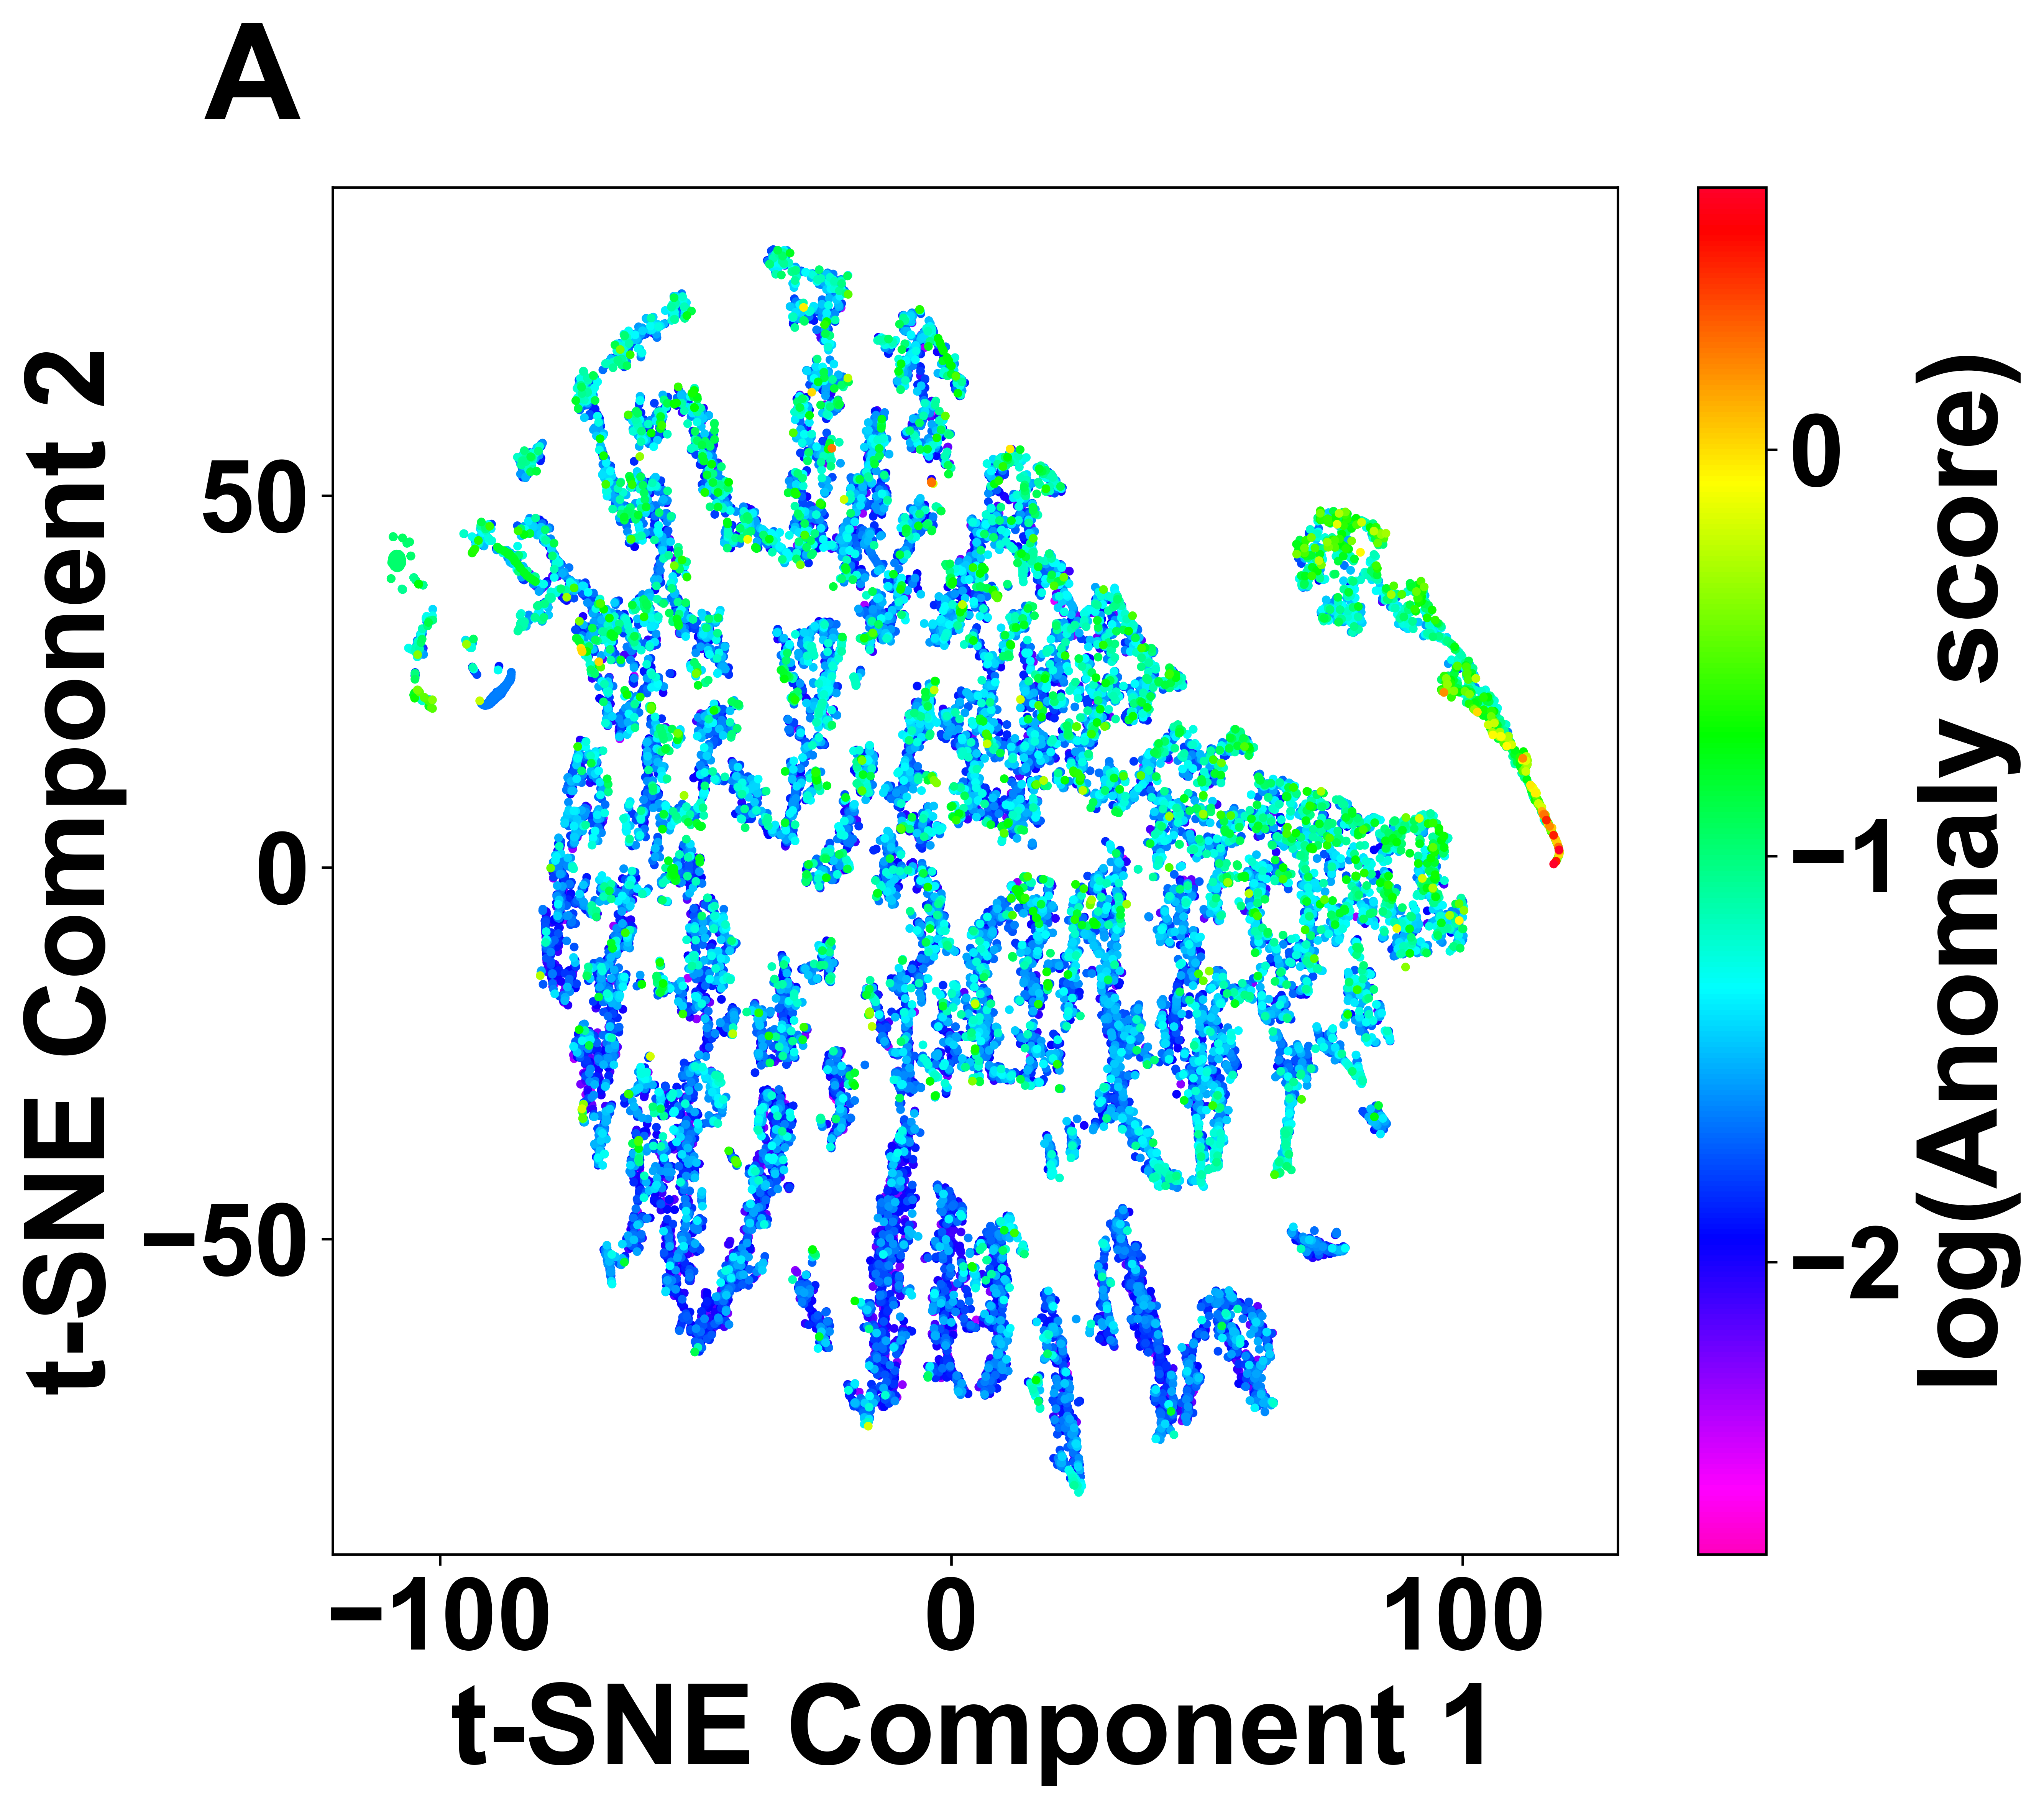

In [9]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=600)
scatter=plt.scatter(embedding[:, 0], embedding[:, 1], 
                    c=np.log(to_tsne.iloc[:-1,:]['anomaly_score']),
                    cmap='gist_rainbow_r', alpha=1, s=3,rasterized=1)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

ax.set_xlabel("t-SNE Component 1",fontweight='bold',color='black')

ax.set_ylabel("t-SNE Component 2",fontweight='bold',color='black')

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("log(Anomaly score)", fontweight='bold',color='black')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')
plt.tight_layout() 
ax.text(-0.1, 1.05, 'A', transform=ax.transAxes,fontsize=m*12,  fontweight='bold')

plt.savefig(f'Figs/fig4_tsne_{n}_.pdf',bbox_inches='tight')

In [10]:
reducer = umap.UMAP(
        n_neighbors=30,
        min_dist=0.75,
        random_state=42,verbose=1
    )
embedding = reducer.fit_transform(to_tsne.iloc[:-1,:][features])

UMAP(min_dist=0.75, n_neighbors=30, random_state=42, verbose=1)
Mon Aug 11 17:48:59 2025 Construct fuzzy simplicial set
Mon Aug 11 17:48:59 2025 Finding Nearest Neighbors
Mon Aug 11 17:48:59 2025 Building RP forest with 13 trees
Mon Aug 11 17:49:08 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	Stopping threshold met -- exiting after 2 iterations
Mon Aug 11 17:49:41 2025 Finished Nearest Neighbor Search
Mon Aug 11 17:49:48 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Aug 11 17:50:37 2025 Finished embedding


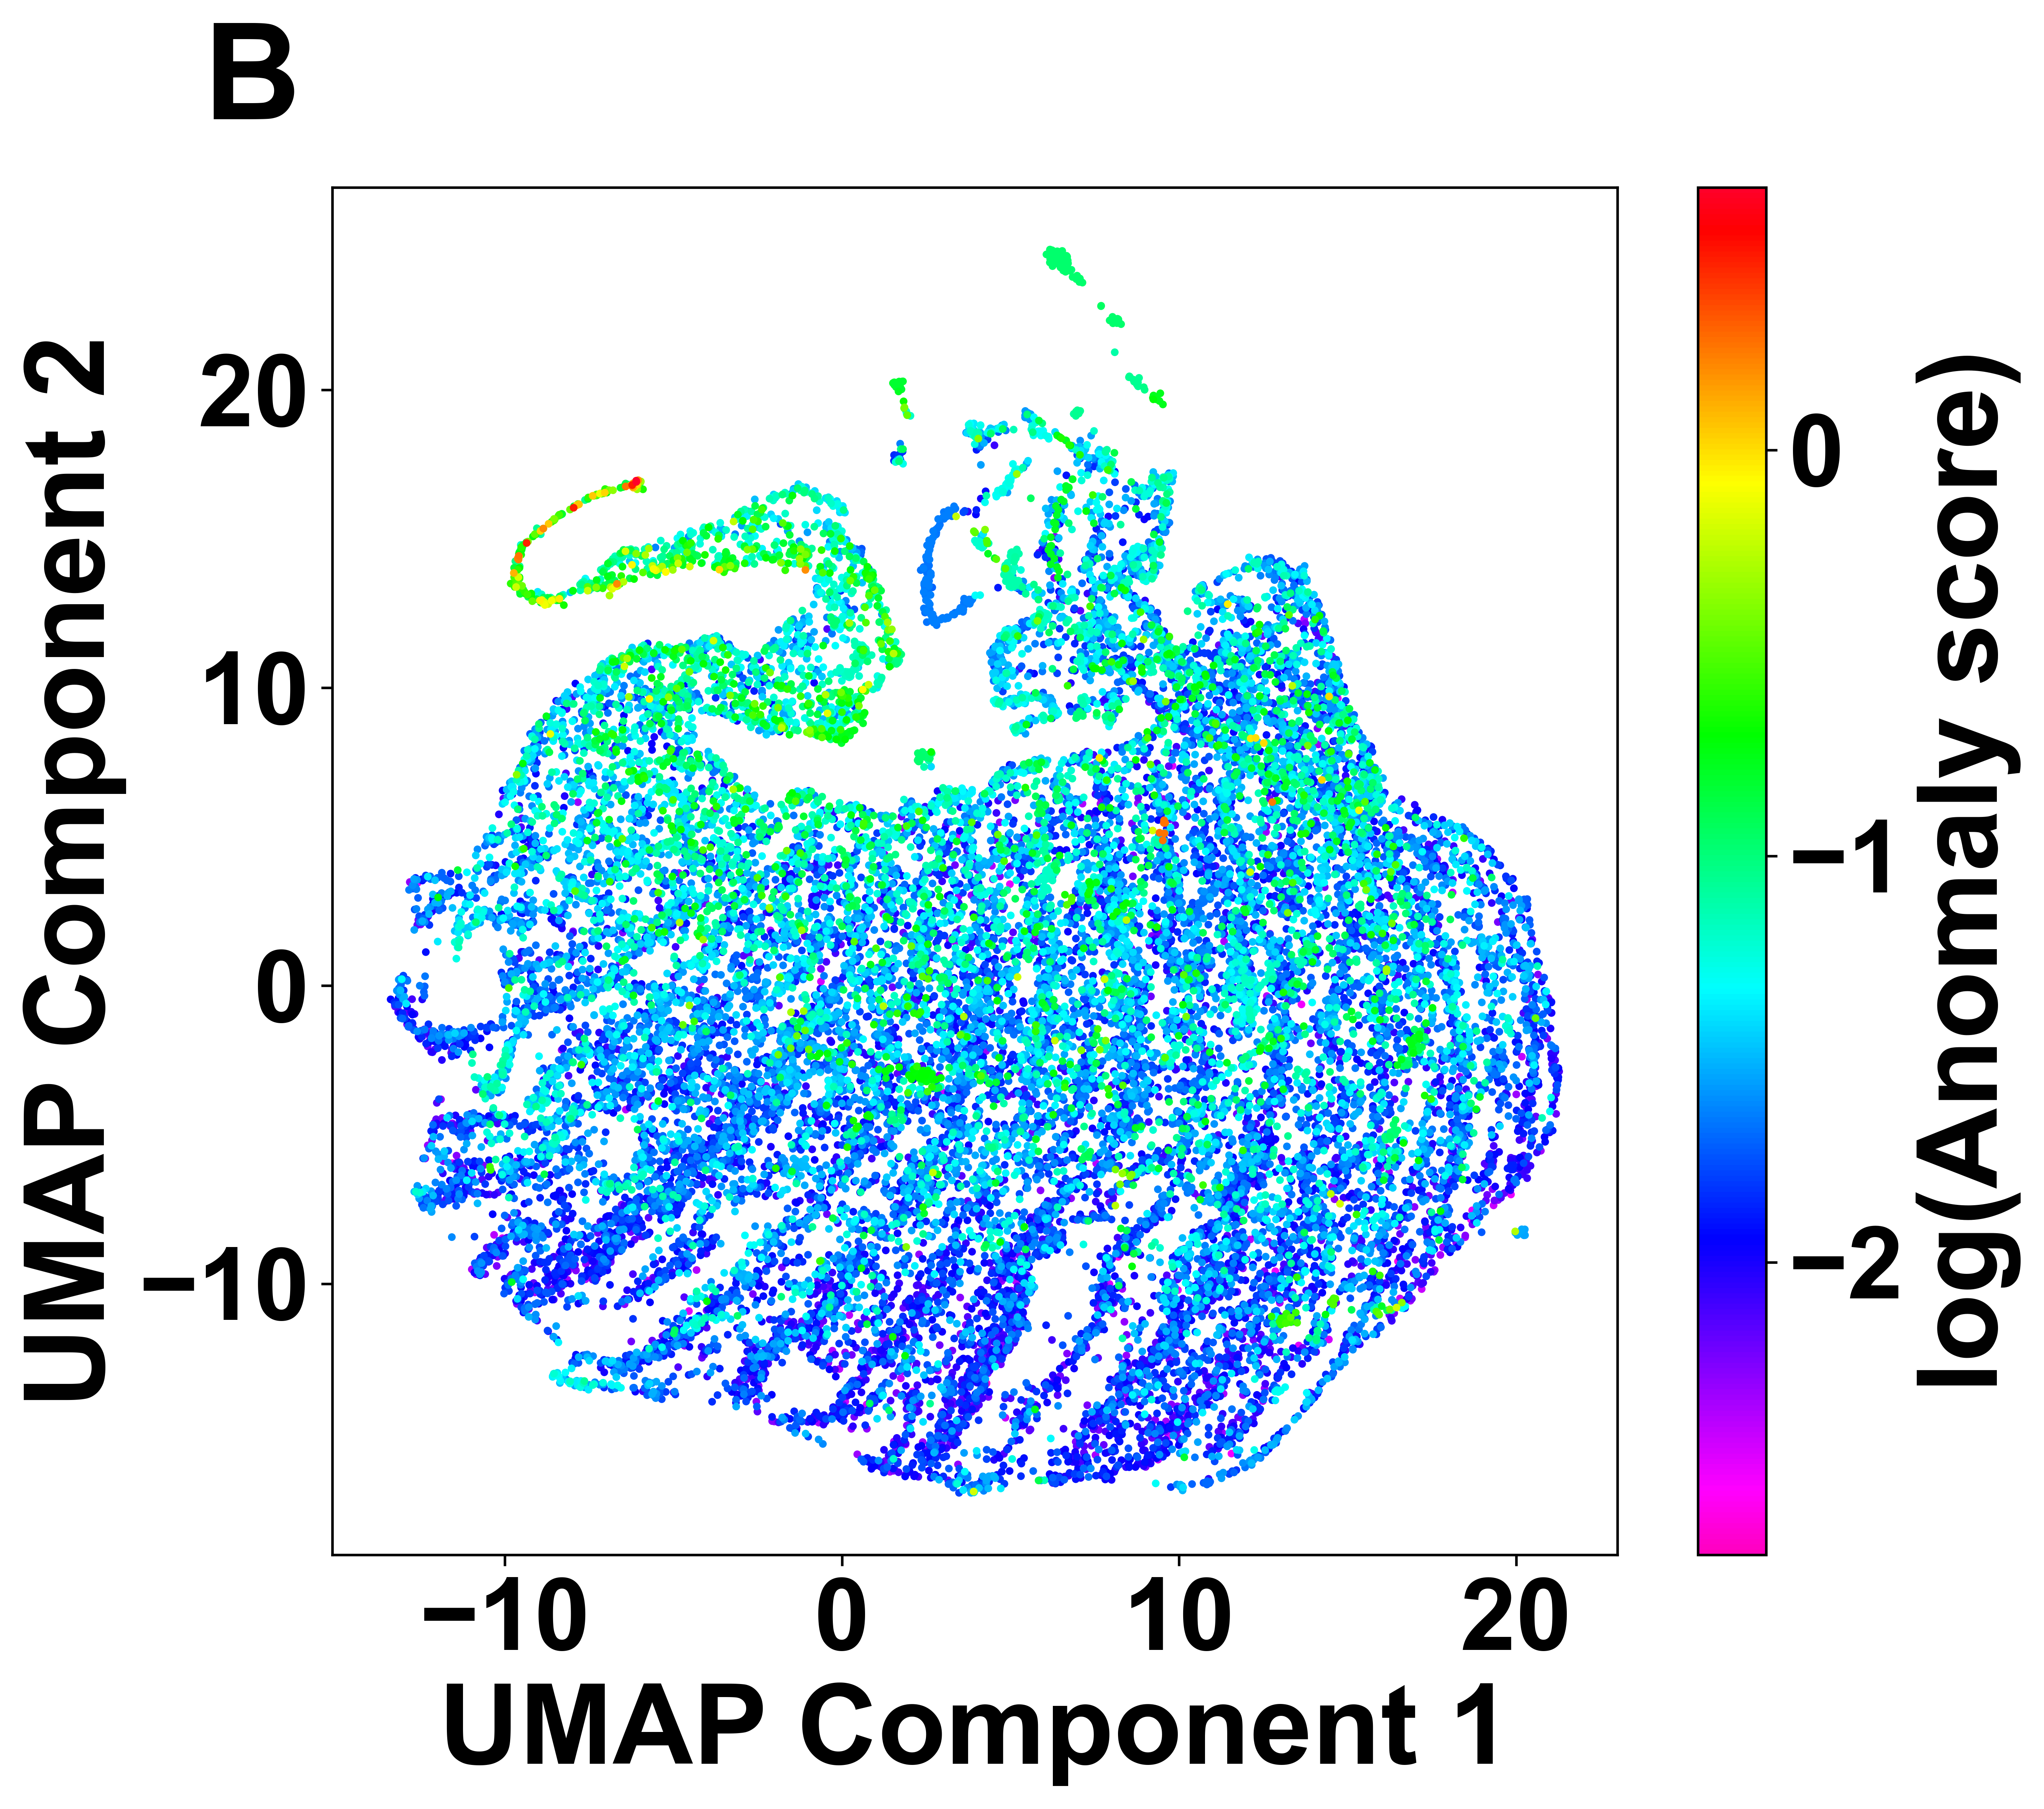

In [11]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=600)
scatter=plt.scatter(embedding[:, 0], embedding[:, 1],
                    c=np.log(to_tsne.iloc[:-1,:]['anomaly_score']),cmap='gist_rainbow_r', alpha=1, s=2,rasterized=1)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

ax.set_xlabel("UMAP Component 1",fontweight='bold',color='black')

ax.set_ylabel("UMAP Component 2",fontweight='bold',color='black')

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("log(Anomaly score)", fontweight='bold',color='black')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')
plt.tight_layout() 
ax.text(-0.1, 1.05, 'B', transform=ax.transAxes,fontsize=m*12,  fontweight='bold')

plt.savefig(f'Figs/fig4_umap.pdf',bbox_inches='tight')